[[[342 470 422]
  [346 182 134]
  [368 384 337]
  [402 296 241]
  [274 222 128]
  [422 232  85]
  [420 212  68]
  [332 226  71]]]
(1, 8, 3)


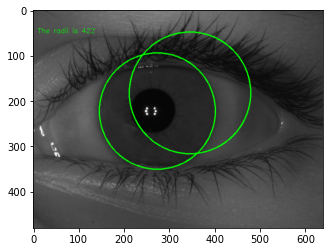

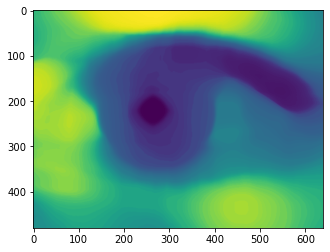

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#get the 3 channel image and convert it into grayscale
img_c = cv2.imread('../input/iris-dataset/LivDet17_IIIT_WVU/Train/Live/1120_live.bmp',cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)

img_eq = cv2.equalizeHist(img_gray)

img_blur = cv2.medianBlur(img_eq, 101)

#generate the circles that has the prospective circles
circles = cv2.HoughCircles(img_blur,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

#create the circles on the images
for i in circles[0,:]:
    if i[2] > 115 and i[2] < 135:
        cv2.circle(img_c, (i[0],i[1]), i[2], (0,255,0), 2)
print(circles)

print(circles.shape)
cv2.putText(img_c,'The radii is '+str(circles[0][0][2]),(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1)

#show the image with the circles
plt.imshow(img_c)
plt.show()
plt.imshow(img_blur)
plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()